In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Initialize notebook mode
init_notebook_mode(connected=True)


In [83]:
t=pd.read_csv('GOOG.csv')

In [84]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [85]:
t.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [86]:
t['date']=pd.to_datetime(t['date'])

In [87]:
print(f"DataFrame contains stock prices between {t['date'].min()} and {t['date'].max()}")

# Calculate total days between minimum and maximum dates
total_days = (t['date'].max() - t['date'].min()).days

# Print total days
print(f"Total days = {total_days} days")

DataFrame contains stock prices between 2016-06-14 00:00:00+00:00 and 2021-06-11 00:00:00+00:00
Total days = 1823 days


In [88]:
t.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


<Axes: >

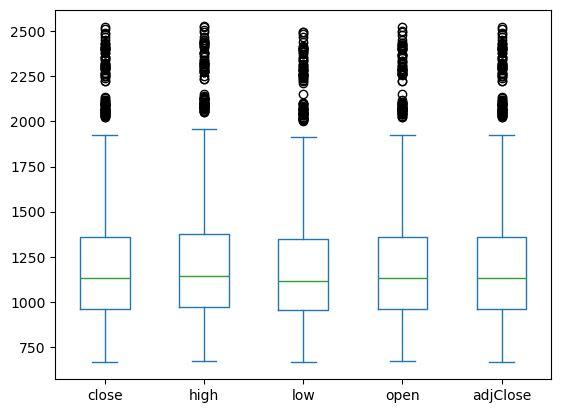

In [89]:
columns_to_plot = ['close', 'high', 'low', 'open', 'adjClose']

# Create a box plot using pandas
t[columns_to_plot].plot(kind='box')


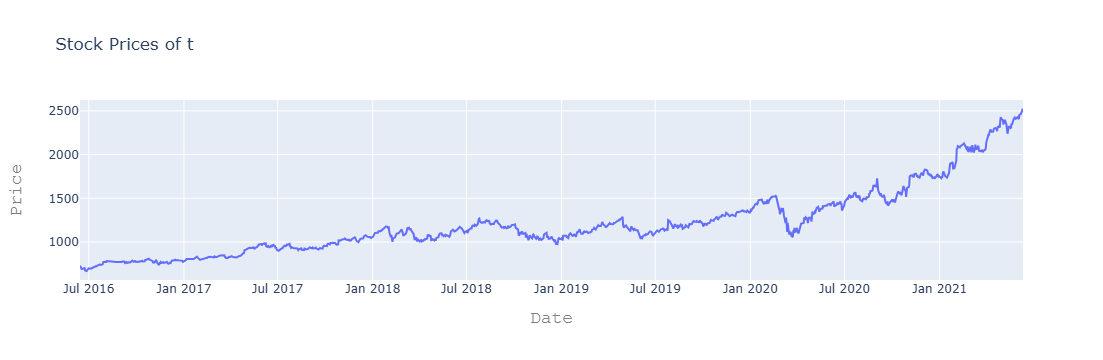

In [91]:
layout = go.Layout(
    title='Stock Prices of t',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

t_data = [{'x': t['date'], 'y': t['close'], 'type': 'scatter', 'mode': 'lines'}]
fig = go.Figure(data=t_data, layout=layout)
iplot(fig)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [93]:
X=np.array(t.index).reshape(-1,1)
Y=t['close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [94]:
scaler = StandardScaler().fit(X_train)

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

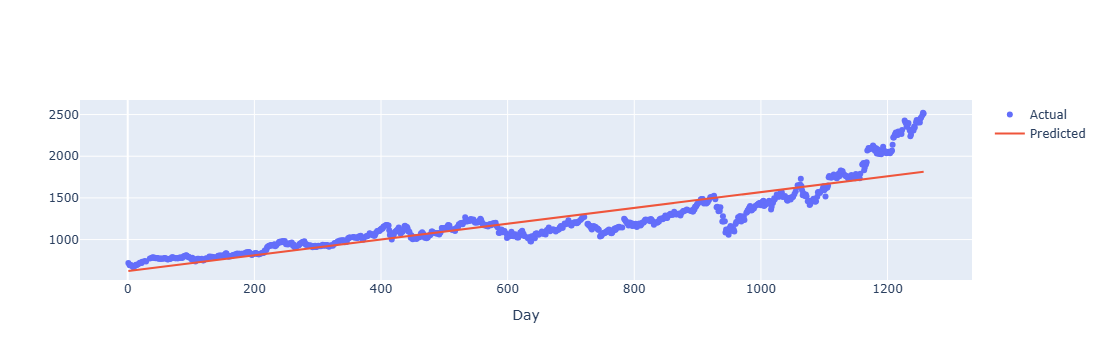

In [97]:
trace0 = go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)

trace1 = go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train),
    mode='lines',
    name='Predicted'
)

t_data = [trace0, trace1]

layout = go.Layout()
layout.xaxis = dict(title='Day')

fig2 = go.Figure(data=t_data, layout=layout)
fig2.show()


In [98]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train)):<20.4f}{r2_score(Y_test, lm.predict(X_test)):<20.4f}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train)):<20.4f}{mse(Y_test, lm.predict(X_test)):<20.4f}
'''

print(scores)



Metric           Train                Test        
r2_score  0.7816              0.8086              
MSE       32790.5551          26360.5250          



In [99]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf = RandomForestRegressor()

In [102]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

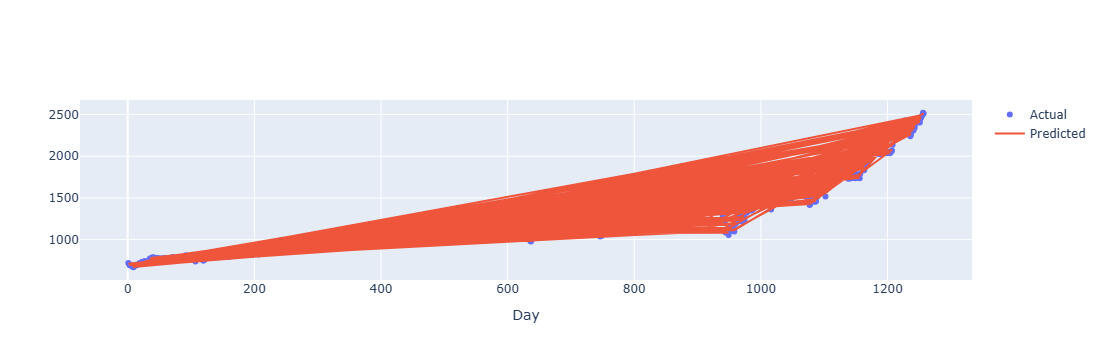

In [103]:
# Create plot traces
trace0 = go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)

trace1 = go.Scatter(
    x=X_train.T[0],
    y=rf.predict(X_train),
    mode='lines',
    name='Predicted'
)
t_data = [trace0, trace1]

layout = go.Layout()
layout.xaxis = dict(title='Day')

fig2 = go.Figure(data=t_data, layout=layout)
fig2.show()

In [104]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, rf.predict(X_train)):<20.4f}{r2_score(Y_test, rf.predict(X_test)):<20.4f}
{'MSE'.ljust(10)}{mse(Y_train, rf.predict(X_train)):<20.4f}{mse(Y_test, rf.predict(X_test)):<20.4f}
'''

print(scores)


Metric           Train                Test        
r2_score  0.9997              0.9974              
MSE       52.0400             358.2216            



# cross validation

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error as mse, make_scorer

In [106]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_train dtype:", X_train.dtype)
print("Y_train dtype:", Y_train.dtype)

X_train shape: (880, 1)
Y_train shape: (880,)
X_train dtype: int64
Y_train dtype: float64


In [107]:
rf = RandomForestRegressor()

In [108]:
cv_scores_r2 = cross_val_score(rf, X_train, Y_train, cv=5, scoring='r2')
cv_scores_mse = cross_val_score(rf, X_train, Y_train, cv=5, scoring=make_scorer(mse))

In [109]:
print(f"Cross-Validation R^2 Scores: {cv_scores_r2}")
print(f"Mean R^2 Score: {np.mean(cv_scores_r2)}")
print(f"Cross-Validation MSE Scores: {cv_scores_mse}")
print(f"Mean MSE Score: {np.mean(cv_scores_mse)}")

Cross-Validation R^2 Scores: [0.99689447 0.99754088 0.99678961 0.99638717 0.99765352]
Mean R^2 Score: 0.9970531290465459
Cross-Validation MSE Scores: [416.9989477  444.85937643 382.63181702 555.68968388 325.9718136 ]
Mean MSE Score: 425.23032772598015
